In [2]:
#!pip install tensorflow==2.0.0
!pip install tensorflow-gpu==2.0.0

     |████████████████████████████████| 380.8MB 45kB/s 
     |████████████████████████████████| 3.8MB 48.3MB/s 
     |████████████████████████████████| 450kB 73.8MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1


In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)
print(tf.test.is_gpu_available())

2.0.0
True


In [0]:
tf.debugging.set_log_device_placement(True)

In [0]:
tf.random.set_seed(1234)


# 0 한글 폰트

In [5]:
!wget "https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKkr-hinted.zip"
!unzip "NotoSansCJKkr-hinted.zip"

--2020-03-11 07:02:42--  https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKkr-hinted.zip
Resolving noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)... 108.177.119.128, 2a00:1450:4013:c00::80
Connecting to noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121163981 (116M) [application/zip]
Saving to: ‘NotoSansCJKkr-hinted.zip’

NotoSansCJKkr-hinte 100%[===================>] 115.55M  37.1MB/s    in 3.1s    

2020-03-11 07:02:46 (37.1 MB/s) - ‘NotoSansCJKkr-hinted.zip’ saved [121163981/121163981]

Archive:  NotoSansCJKkr-hinted.zip
  inflating: LICENSE_OFL.txt         
  inflating: NotoSansCJKkr-Black.otf  
  inflating: NotoSansCJKkr-Bold.otf  
  inflating: NotoSansCJKkr-DemiLight.otf  
  inflating: NotoSansCJKkr-Light.otf  
  inflating: NotoSansCJKkr-Medium.otf  
  inflating: NotoSansCJKkr-Regular.otf  
  inflating: NotoSansCJKkr-T

In [0]:
!mv NotoSansCJKkr-Medium.otf /usr/share/fonts/truetype/

In [0]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_dirs = ['/usr/share/fonts/truetype']
font_files = fm.findSystemFonts(fontpaths=font_dirs)
font_list = fm.createFontList(font_files)
fm.fontManager.ttflist.extend(font_list)
plt.rcParams['font.family'] = "Noto Sans CJK KR"

# 1. 데이터 읽기 

Contents of the Notebook:
Part1: Exploratory Data Analysis(EDA):

1)Analysis of the features.

2)Finding any relations or trends considering multiple features.
Part2: Feature Engineering and Data Cleaning:

1)Adding any few features.

2)Removing redundant features.

3)Converting features into suitable form for modeling.
Part3: Predictive Modeling

1)Running Basic Algorithms.

2)Cross Validation.

3)Ensembling.

4)Important Features Extraction

# 1. 데이터 불러오기

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [9]:
import os
from pathlib import Path

folder = "Colab Notebooks/dacon"
project_dir = "temperature_forecasting"

base_path = Path("/content/drive/My Drive/")
project_path = base_path / folder / project_dir
os.chdir(project_path)
# for x in list(project_path.glob("*")):
#     if x.is_dir():
#         dir_name = str(x.relative_to(project_path))
#         os.rename(dir_name, dir_name.split(" ", 1)[0])
print(f"현재 디렉토리 위치: {os.getcwd()}")

현재 디렉토리 위치: /content/drive/My Drive/Colab Notebooks/dacon/temperature_forecasting


In [10]:
df = pd.read_csv('./data/'+'train.csv')
df.shape

(4752, 60)

* 4320개(30일)
* 432개(3일) 

|-|30일(train)|3일(train)|80일(test)|
|---|---|---|---|
|Y18|NULL|432개|NULL|
|Y00-Y17|4320개|NULL|NULL|
|X00-X17|4320개|432개|11520개|

In [0]:
n = 4320

In [12]:
df_test = pd.read_csv('./data/test.csv')
df_test.shape

(11520, 41)

## x

* feat_temp: 기온 
* feat_air_press: 현지기압
* feat_wind_speed: 풍속
* feat_rainfall: 일일 누적강수량 
* feat_sea_press: 해면기압
* feat_insol: 일일 누적일사량
* feat_humid: 습도
* feat_dir_wind: 풍향



In [0]:
#feat_x = [feat_temp, feat_air_press, feat_wind_speed, feat_rainfall, feat_sea_press, feat_insol, feat_humid, feat_dir_wind]
feat_x = ['X00', 'X01', 'X02', 'X03', 'X04', 'X05', 'X06', 'X07', 'X08', 'X09', 
          'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 
          'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 
          'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39']
feat_temp = ['X00', 'X07', 'X28', 'X31', 'X32']
feat_air_press = ['X01', 'X06', 'X22', 'X27', 'X29']
feat_wind_speed = ['X02', 'X03', 'X18', 'X24', 'X26']
feat_rainfall = ['X04', 'X10', 'X21', 'X36', 'X39']
feat_sea_press = ['X05', 'X08', 'X09', 'X23', 'X33']
feat_insol = ['X11', 'X14', 'X16', 'X19', 'X34']
feat_humid = ['X12', 'X20', 'X30', 'X37', 'X38']
feat_dir_wind = ['X13', 'X15', 'X17', 'X25', 'X35']

In [14]:
df[feat_x].head(3)

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,1009.8,0.0,0.0,82.4,71.3,0.0,101.1,0.0,56.1,0.3,0.0,91.0,0.0,1002.5,1009.8,1.1,2.3,0.5,1008.7,12.3,1001.6,69.1,8.2,10.7,1010.1,0.0,256.4,0.0,77.2,62.6,0.0
1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,1009.9,0.0,0.0,81.2,121.8,0.0,165.3,0.0,0.0,0.4,0.0,91.9,0.0,1002.5,1009.9,0.0,0.0,0.0,1008.7,12.1,1001.7,70.3,8.3,10.3,1010.1,0.0,215.4,0.0,77.3,63.5,0.0
2,9.4,989.0,1.1,2.3,0.0,1009.2,989.7,12.1,1010.1,1010.1,0.0,0.0,86.1,232.0,0.0,144.0,0.0,0.0,0.6,0.0,93.3,0.0,1002.4,1009.8,0.0,0.0,0.0,1008.6,12.1,1001.6,71.5,8.0,9.7,1010.0,0.0,235.2,0.0,77.3,63.9,0.0


In [15]:
df[feat_x].tail(3)

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
4749,19.7,987.7,0.9,0.6,0.0,1006.9,987.6,21.4,1007.4,1007.5,2.5,23.88,95.9,127.8,0.0,256.1,0.0,299.1,0.6,0.0,90.8,10.5,1000.4,1007.6,0.0,0.0,0.2,1006.0,23.6,999.5,90.2,17.8,19.2,1007.5,22.16,254.2,0.0,83.0,58.9,0.5
4750,19.4,987.7,0.9,0.8,0.0,1006.9,987.8,21.3,1007.6,1007.5,2.5,23.88,95.9,323.8,0.0,255.1,0.0,0.0,0.6,0.0,91.5,10.5,1000.4,1007.6,0.0,0.0,0.1,1006.0,23.3,999.5,90.1,17.7,19.3,1007.6,22.16,300.0,0.0,83.2,59.8,0.5
4751,19.1,987.6,1.0,0.3,0.0,1006.8,987.8,21.2,1007.5,1007.4,2.5,23.88,96.2,0.0,0.0,237.2,0.0,17.7,0.0,0.0,93.0,10.5,1000.3,1007.6,0.0,0.0,0.1,1006.1,23.2,999.5,89.6,17.7,19.5,1007.7,22.16,157.5,0.0,84.0,59.5,0.5


In [16]:
df_test.describe()

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
count,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.0,11520.000000,11520.0,11520.000000,11520.000000,11520.0,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000
mean,10511.500000,25.145625,987.616693,1.401033,1.479436,2.396016,1006.869314,987.839045,26.032352,1007.321424,1006.938741,2.709115,8.311291,79.575564,114.648646,0.0,125.218993,0.0,136.219931,1.354696,0.0,80.689931,2.847092,1000.417891,1007.368984,1.137622,147.054679,1.349800,1005.802595,26.468750,999.435260,76.208698,24.544392,24.519905,1007.319826,8.480451,172.389991,2.266267,79.336875,71.271146,2.332856
std,3325.681885,3.824374,4.624002,1.376209,1.087042,6.382526,4.757237,4.637961,3.513596,4.788943,4.777357,8.494738,8.678047,16.028721,105.976126,0.0,107.245099,0.0,109.632121,1.251191,0.0,17.504181,8.507719,4.712652,4.743564,1.060000,109.343527,1.277034,4.765731,3.527912,4.690173,15.845644,4.040956,4.021288,4.778875,8.997879,109.130854,8.564625,14.861512,15.016123,6.591677
min,4752.000000,15.500000,970.300000,0.000000,0.000000,0.000000,990.000000,971.300000,17.300000,990.500000,989.200000,0.000000,0.000000,29.100000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,30.000000,0.000000,983.700000,990.500000,0.000000,0.000000,0.000000,989.400000,18.700000,982.700000,25.800000,14.200000,15.100000,990.900000,0.000000,0.000000,0.000000,27.500000,22.800000,0.000000
25%,7631.750000,22.300000,985.300000,0.400000,0.700000,0.000000,1004.400000,985.500000,23.300000,1004.900000,1004.500000,0.000000,0.050000,67.300000,21.075000,0.0,23.900000,0.0,29.075000,0.400000,0.0,67.300000,0.000000,998.000000,1004.900000,0.300000,43.300000,0.300000,1003.300000,23.700000,997.100000,64.400000,21.500000,21.400000,1004.800000,0.000000,73.100000,0.000000,68.600000,60.700000,0.000000
50%,10511.500000,25.300000,987.900000,1.100000,1.300000,0.000000,1007.200000,988.100000,26.100000,1007.700000,1007.300000,0.000000,5.800000,83.300000,71.700000,0.0,119.400000,0.0,128.000000,1.000000,0.0,86.400000,0.000000,1000.700000,1007.700000,0.900000,140.400000,1.100000,1006.100000,26.500000,999.700000,79.800000,24.500000,24.500000,1007.600000,5.715000,178.800000,0.000000,82.100000,72.000000,0.000000
75%,13391.250000,27.600000,990.700000,2.000000,2.000000,0.700000,1010.000000,991.000000,28.300000,1010.500000,1010.100000,0.500000,15.680000,94.000000,204.925000,0.0,219.300000,0.0,224.100000,2.100000,0.0,97.100000,1.000000,1003.500000,1010.500000,1.700000,254.800000,2.000000,1008.900000,28.800000,1002.500000,90.200000,27.200000,27.300000,1010.400000,15.860000,261.400000,0.100000,92.725000,84.300000,0.500000
max,16271.000000,36.300000,998.100000,11.000000,10.900000,46.500000,1018.000000,998.500000,36.000000,1018.500000,1017.900000,57.000000,31.250000,98.700000,359.900000,0.0,359.900000,0.0,360.000000,10.300000,0.0,97.900000,64.500000,1011.400000,1018.500000,9.900000,359.900000,11.900000,1016.900000,36.500000,1010.300000,97.200000,35.300000,35.800000,1018.400000,31.640000,359.900000,97.700000,96.800000,95.900000,79.500000


## y

### feat_y

In [0]:
feat_y = ['Y00', 'Y01', 'Y02', 'Y03', 'Y04', 'Y05', 'Y06', 'Y07', 'Y08', 'Y09', 'Y10', 'Y11', 'Y12', 'Y13', 'Y14', 'Y15', 'Y16', 'Y17']

In [18]:
df[feat_y].shape

(4752, 18)

Y00 -Y17의 null 값이 없는 부분만 추출 

In [19]:
df_y = df[feat_y][:n]
df_y.shape 

(4320, 18)

### y 그룹화

6개의 그룹으로 나눠보기로 한다. 

'Y03', 'Y04'  
'Y00'  
'Y05', 'Y08', 'Y14'  
'Y13','Y01', 'Y02'  
'Y09', 'Y10', 'Y11', 'Y17', 'Y15',  Y16'  
'Y12', 'Y06', 'Y07'



In [0]:
df_y_g1 = df_y[['Y03', 'Y04']]
df_y_g2 = df_y[['Y00']]
df_y_g3 = df_y[['Y05', 'Y08', 'Y14']]
df_y_g4 = df_y[['Y13','Y01', 'Y02']]
df_y_g5 = df_y[['Y09', 'Y10', 'Y11', 'Y17', 'Y15', 'Y16']]
df_y_g6 = df_y[['Y12', 'Y06', 'Y07']]

# model

간단한 모델을 구성해보자  


1.   X 중 기온 데이터인 feat_temp만 사용해서 Y00~17의 온도를 추정하는 모델 만들기 
2.   1번에서 만든 모델로 Y00 ~ Y17의 비어있는 3일간의 데이터를 예측  
3.   2번에서 추정한 Y00 ~ Y17의 온도, Y18을 이용해서 Y00~17로 Y18을 추정하는 모델 만들기
4.   test data에 대해 1번에서 만든 모델로 Y00 ~ Y17을 예측. 예측한 Y00 ~ Y17과 3번에서 만든 모델로 Y18 온도를 예측  



## 1.
df_y_g4에 대해 모델링 해보기 (X 5군데와 전체적으로 유사해서 선택함) 

데이터셋  
* X_feat_temp 와 Y00-Y17, 모두 존재하는 rows는 4320 개.  
* 해당 시점에 Y00-Y17 지역의 온도를 추정할 것이므로 시리즈 데이터로 보지 않음.
* 모든 features를 사용하지는 않고 feat_temp만 사용.
* 모든 지역을 맞추기보다 그룹화 된 지역의 평균 온도를 타겟으로 함.   
* 즉, feat_temp = ['X00', 'X07', 'X28', 'X31', 'X32']를 features로 보고, mean(['Y13','Y01', 'Y02'])을 target으로 하는 모델을 구성할 것.
* train 90%, test 10%


### dataset 

#### Split the data into train and test

In [0]:
## 
frac = 0.9 # train data 비율 

In [0]:
## y_col : y_col인 컬럼들의 평균을 타겟 값으로 할 것.
y_col = ['Y15', 'Y16'] ##list(df_y_g3.columns)
x_col = feat_temp

In [0]:
dataset = df[x_col+y_col][:n]
dataset['Y']= df[y_col].mean(axis=1)
dataset = dataset.drop(y_col, axis=1) 

In [0]:
train_dataset = dataset.sample(frac=frac,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [85]:
train_dataset.shape, test_dataset.shape

((3888, 6), (432, 6))

#### Split features from labels

In [0]:
train_labels = train_dataset.pop('Y')
test_labels = test_dataset.pop('Y')

In [87]:
train_dataset.shape, test_dataset.shape

((3888, 5), (432, 5))

In [88]:
train_labels.shape, test_labels.shape

((3888,), (432,))

In [89]:
len(train_dataset.keys())

5

## model

#### Build the model

In [0]:
def build_model():
    model = keras.Sequential([
            layers.Dense(64, activation='linear', input_shape=[len(train_dataset.keys())]),
            layers.Dense(1)
    ])
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae', 'mse'])
    return model

In [101]:
model = build_model()

Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0


#### Inspect the model

In [102]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                384       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 449
Trainable params: 449
Non-trainable params: 0
_________________________________________________________________


In [104]:
example_batch = train_dataset[:5]
example_result = model.predict(example_batch)
example_result

array([[17.670082],
       [14.370525],
       [10.825291],
       [16.287947],
       [13.428522]], dtype=float32)

#### Train the model

In [0]:
# 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

In [105]:
EPOCHS = 200

history = model.fit(
  train_dataset, train_labels,
  epochs=EPOCHS, validation_split = 0.9, verbose=0,
  callbacks=[PrintDot()])

Executing op __inference_keras_scratch_graph_308001 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_keras_scratch_graph_308147 in device /job:localhost/replica:0/task:0/device:GPU:0

....................................................................................................
....................................................................................................

In [106]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
195,5.872605,2.052953,5.872604,6.518428,2.031668,6.518427,195
196,6.211838,2.071460,6.211837,5.862733,1.989111,5.862733,196
197,5.860877,2.061833,5.860877,7.325821,2.254170,7.325821,197
198,6.071305,2.072008,6.071305,5.766384,1.989980,5.766386,198
199,5.972571,2.042084,5.972571,8.540838,2.423893,8.540838,199


In [0]:
def plot_history(history, ylim_mae=False, ylim_mse=False):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(20,6))

    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [Y]]')
    plt.plot(hist['epoch'], hist['mae'],
            label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],
            label = 'Val Error')
    if ylim_mae: 
        plt.ylim(ylim_mae)
    else:
        plt.ylim([0,5])
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$Y^2$]')
    plt.plot(hist['epoch'], hist['mse'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
    if ylim_mse: 
        plt.ylim(ylim_mse)
    else:
        plt.ylim([0,20])
    plt.legend()
    plt.show()


Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0


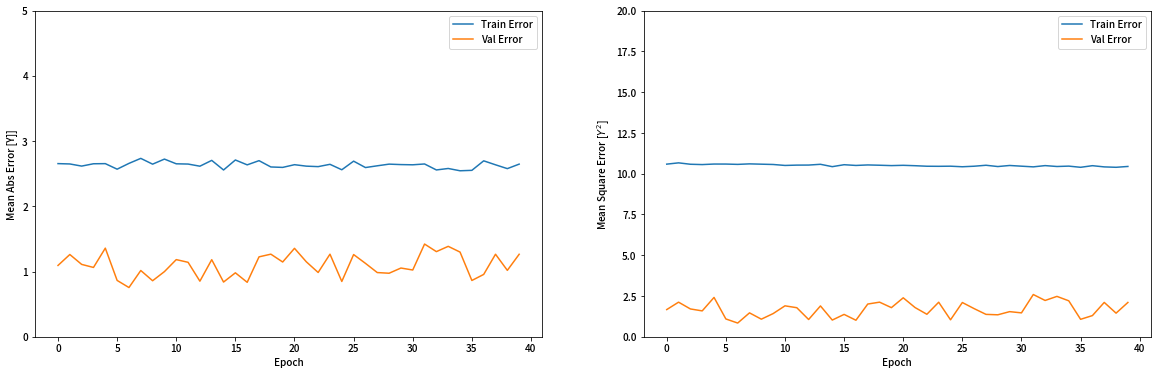

In [166]:
plot_history(history)

### Make predictions

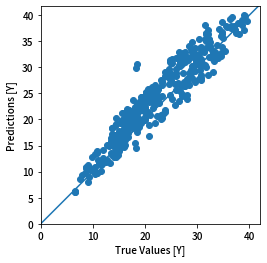

In [109]:
test_predictions = model.predict(test_dataset).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Y]')
plt.ylabel('Predictions [Y]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])


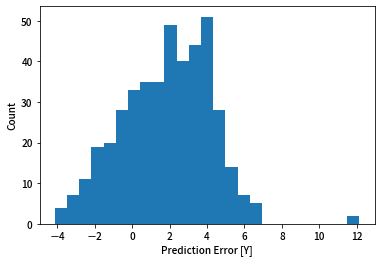

In [110]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Y]")
_ = plt.ylabel("Count")

#### 3일 예측해서 Y18과 비교해보기

In [111]:
test = df[x_col][n:n+n//10]
test_predictions = model.predict(test).flatten()

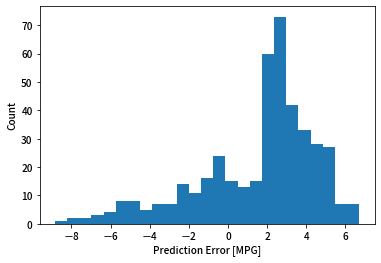

In [112]:
error = test_predictions-df['Y18'][n:n+n//10]
error.mean()
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

In [113]:
error[abs(error)>7]

4536   -7.543457
4676   -7.547287
4677   -8.069122
4678   -7.979454
4679   -8.843651
Name: Y18, dtype: float64

#### 80일 예측 

In [114]:
test_predictions = model.predict(df_test[feat_temp])

In [0]:
# 제출 파일 만들기
submit = pd.DataFrame({'id':range(144*33, 144*113),
              'Y18':test_predictions.reshape(1,-1)[0]})

In [0]:
submit.to_csv('baseline_result.csv', index = False)

## model2

#### Build the model

In [0]:
def build_model2():
    model = keras.Sequential([
            layers.Dense(1, activation='linear', input_shape=[1]),
            #layers.Dense(2, activation='relu'),
            #layers.Dense(1)
    ])
    optimizer = tf.keras.optimizers.RMSprop(0.005)
    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae', 'mse'])
    return model

In [131]:
model2 = build_model2()

Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0


#### Inspect the model

In [132]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [133]:
example_batch = test_predictions[:10]
example_result = model2.predict(example_batch)
example_result

Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_distributed_function_438376 in device /job:localhost/replica:0/task:0/device:GPU:0


array([[-8.847661 ],
       [-8.869696 ],
       [-8.866367 ],
       [-8.7929945],
       [-8.746607 ],
       [-8.82803  ],
       [-8.784471 ],
       [-8.672686 ],
       [-8.572959 ],
       [-8.621816 ]], dtype=float32)

#### Train the model

In [149]:
EPOCHS = 40
## model1를 이용해 Yi를 예측한 결과를 train data로 이용
## Y18을 test data로 함
tmp_features =  model.predict(df[x_col][n:n+n//10])
tmp_labels = np.array(df['Y18'][n:n+n//10])

history = model2.fit(
  tmp_features, tmp_labels,
  epochs=EPOCHS, validation_split = 0.1, verbose=0,
  callbacks=[PrintDot()])

Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0

........................................

In [150]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
35,10.393738,2.551797,10.393739,1.072443,0.863503,1.072443,35
36,10.492647,2.697592,10.492647,1.300978,0.956257,1.300978,36
37,10.418943,2.636713,10.418942,2.108473,1.265685,2.108473,37
38,10.393889,2.578135,10.393888,1.449867,1.018596,1.449867,38
39,10.445841,2.647075,10.445841,2.106113,1.265206,2.106113,39


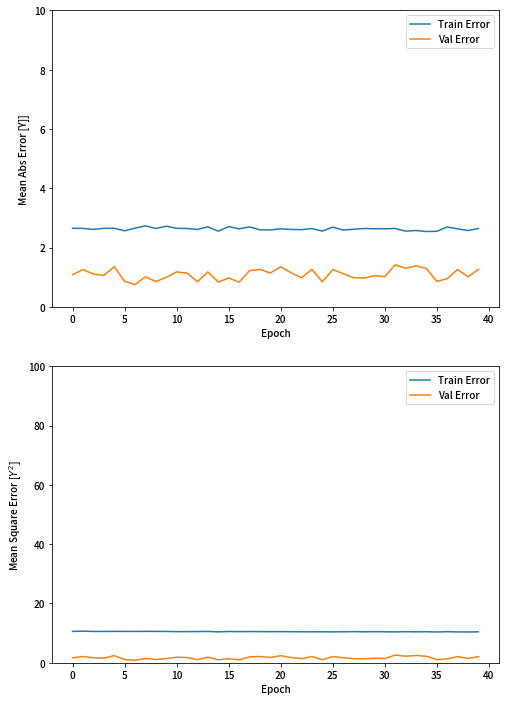

In [155]:
plot_history(history, ylim_mae=(0, ), ylim_mse=(0, 100))

### Make predictions

#### 80일 예측 

In [167]:
test_predictions1 = model.predict(df_test[feat_temp])
test_predictions2 = model2.predict(test_predictions1)

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_keras_scratch_graph_307564 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/d

In [0]:
# 제출 파일 만들기
submit = pd.DataFrame({'id':range(144*33, 144*113),
              'Y18':test_predictions2.reshape(1,-1)[0]})

In [0]:
submit.to_csv('baseline_result_2.csv', index = False)